# Predicting Sale Price of Bulldozers using Machine Learning

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

### There are 3 main datasets:

1. Train.csv is the training set, which contains data through the end of 2011.
2. Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
3. Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("TrainAndValid.csv", low_memory=False)
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
data.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
data.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

<Axes: ylabel='Frequency'>

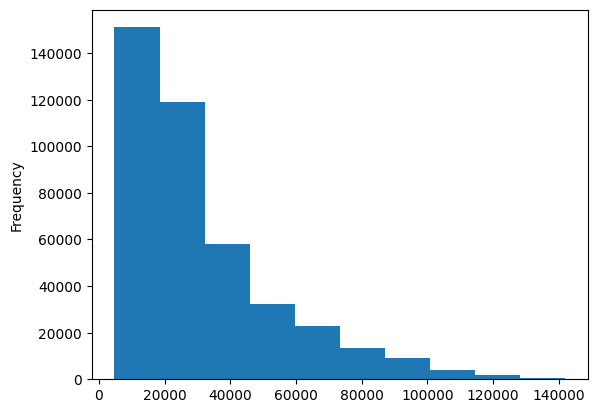

In [7]:
data["SalePrice"].plot.hist()

In [8]:
data["saledate"][:10]

0    11/16/2006 0:00
1     3/26/2004 0:00
2     2/26/2004 0:00
3     5/19/2011 0:00
4     7/23/2009 0:00
5    12/18/2008 0:00
6     8/26/2004 0:00
7    11/17/2005 0:00
8     8/27/2009 0:00
9      8/9/2007 0:00
Name: saledate, dtype: object

## Parsing Dates to Python Datetime Format


In [9]:
data = pd.read_csv("TrainAndValid.csv", low_memory=False,
                   parse_dates=["saledate"])
data["saledate"][:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

In [10]:
data["saledate"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 412698 entries, 0 to 412697
Series name: saledate
Non-Null Count   Dtype         
--------------   -----         
412698 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.1 MB


Text(0, 0.5, 'Sale Price')

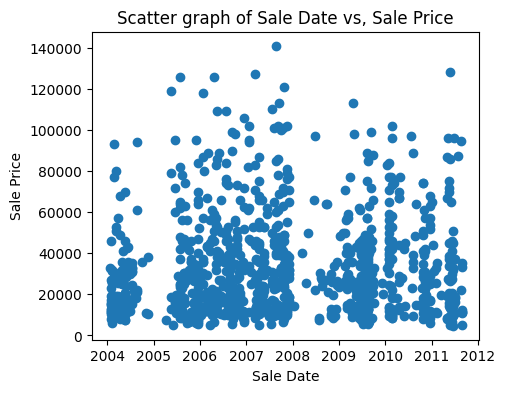

In [11]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.scatter(data["saledate"][:1000], data["SalePrice"][:1000])
plt.title("Scatter graph of Sale Date vs, Sale Price")
plt.xlabel("Sale Date")
plt.ylabel("Sale Price")

## Sorting our Data by Sale Date.

As working with a time Series data, it's better to sort our data by Date to train our model with pas Data & to predict the future prices.


In [12]:
data.sort_values(by=["saledate"], inplace=True, ascending=True)
data["saledate"][:10]

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

### Adding more information about the sale Dates to give the model extra information to form patterns.


In [13]:
data["saleYear"] = data["saledate"].dt.year
data["saleMonth"] = data["saledate"].dt.month
data["saleDay"] = data["saledate"].dt.day

In [14]:
data.drop("saledate", axis=1, inplace=True)

In [15]:
data.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [16]:
data["state"].value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

In [17]:
data.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

### Converting all the String and Object types to Numerical values for the Estimator to find patterns


In [18]:
for label, content in data.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [19]:
for label, content in data.items():
    if pd.api.types.is_object_dtype(content):
        data[label] = content.astype("category").cat.as_ordered()

In [20]:
data.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

In [21]:
data["state"].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

### Now we'll fill the Missing values in our data.

- First we'll fill all the missing values in the columns that have numerical values.


In [22]:
for label, content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            data[label] = content.fillna(content.median())
            data[label + "_is_missing"] = pd.isnull(content)

- Now we'll fill the missing values and change the values of the categories columns to numeric.


In [23]:
for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        data[label + "_is_missing"] = pd.isnull(content)
        data[label] = pd.Categorical(content).codes + 1

In [24]:
data.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64

## Now we'll instantiate our Machine Learning Model and train the MOdel.


In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
RfModel = RandomForestRegressor(n_jobs=-1)

### We'll split our Data into Training and Validation Sets


In [27]:
train_data = data[data["saleYear"] != 2012]
val_data = data[data["saleYear"] == 2012]

In [28]:
X_train, y_train = train_data.drop(
    "SalePrice", axis=1), train_data["SalePrice"]
X_test, y_test = val_data.drop("SalePrice", axis=1), val_data["SalePrice"]

**Training our Model on the Training Data**


In [30]:
RfModel.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [31]:
RfModel.score(X_test, y_test)

0.8733990988365181

### Building an Evaluation function to get all the Evaluation metrics


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error


def get_scores(y_test, y_predictions):
    """This functions takes y_true and y_preds & return the evaluation metrics of MAE, MSLE, Root MSLE."""
    msle = mean_squared_log_error(y_test, y_predictions)
    scores = {
        "Mean Absolute Error": mean_absolute_error(y_test, y_predictions),
        "Mean Squared Log Error": msle,
        "Root Mean Squared Log Error": np.sqrt(msle)
    }
    return scores

In [33]:
y_preds = RfModel.predict(X_test)
get_scores(y_test, y_preds)

{'Mean Absolute Error': np.float64(6091.9350980731015),
 'Mean Squared Log Error': np.float64(0.0641779628020875),
 'Root Mean Squared Log Error': np.float64(0.25333369851262877)}

As our model is doing pretty good in Baseline Predictions,

The `Accuracy or R^2 SCore` is `87.37%`. and other metrics are:

`Mean Absolute Error: 6098.439891989976`

`Mean Squared Log Error: 0.06408415785037283`

`Root Mean Squared Log Error: 0.25314848972564075`

### Now we'll try to Tune our model to improve it's Accuracy and Predictions.

## Hyperparameters tuning with RandomizedSearchCV


In [37]:
%%time

from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": np.arange(10, 400, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1.0, "sqrt"],
           "max_samples": [10000]}

Rf_Model_rscv = RandomizedSearchCV(RandomForestRegressor(), param_distributions=grid, cv=5, verbose=True, n_iter=20, n_jobs=-1)

Rf_Model_rscv.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 2min 20s
Wall time: 13min 40s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1.0, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390])},
                   verbose=True)

In [38]:
Rf_Model_rscv.best_params_

{'n_estimators': np.int64(370),
 'min_samples_split': np.int64(12),
 'min_samples_leaf': np.int64(1),
 'max_samples': 10000,
 'max_features': 1.0,
 'max_depth': None}

In [39]:
Rf_Model_rscv.score(X_test, y_test)

0.8300114434578245

As the Max Sample Size was set to `10,000` because of limited computational power,

The same model is trained on other computer with more computational power and by providing the argument of `n_iter=100` and `max_samples=None`.

The `best_params_` of that trained model is following:

`n_estimators=90`

`min_samples_leaf=1`

`min_samples_split=14`

`max_features=0.5`

`n_jobs=-1`

`max_samples=None`


### Now we'll train our model with the `best_params_` provided.


In [40]:
%%time

RF_ideal = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)

RF_ideal.fit(X_train, y_train)

CPU times: total: 16min 46s
Wall time: 2min 21s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=90,
                      n_jobs=-1)

In [41]:
RF_ideal.score(X_test, y_test)

0.8825478514092161

In [42]:
y_preds = RF_ideal.predict(X_test)

get_scores(y_test, y_preds)

{'Mean Absolute Error': np.float64(5898.5844946959805),
 'Mean Squared Log Error': np.float64(0.058595019776260436),
 'Root Mean Squared Log Error': np.float64(0.2420640819623193)}

## Now we've trained our model, now we'll try our model into the Real Test Data.


In [61]:
test_data = pd.read_csv("Test.csv", parse_dates=["saledate"])

test_data.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


Now we've to transform our Test data into the same format as we've provided to our model during training the model.


In [62]:
test_data["saleYear"] = test_data["saledate"].dt.year
test_data["saleMonth"] = test_data["saledate"].dt.month
test_data["saleDay"] = test_data["saledate"].dt.day

test_data.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688.0,28555.0,6038.0,8940.0,2286.0
UsageBand,Low,High,Medium,High,Low
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K


In [63]:
test_data.drop("saledate", inplace=True, axis=1)

In [64]:
for label, content in test_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            test_data[label + "_is_missing"] = pd.isnull(content)
            test_data[label] = content.fillna(content.median())

    elif not pd.api.types.is_numeric_dtype(content):
        test_data[label + "_is_missing"] = pd.isnull(content)
        test_data[label] = pd.Categorical(content).codes + 1

In [65]:
set(X_train.columns) - set(test_data.columns)

{'auctioneerID_is_missing'}

As `auctioneerID_is_missing` column is still missing in our Dataset,

it's because our Training dataset had missing `auctioneerID` values and our Test Dataset has no missing values in the `auctioneerID` column. so to match our dataset with the training dataset format we'll fill the column with `False` value.


In [66]:
test_data["auctioneerID_is_missing"] = False

In [67]:
test_data["auctioneerID_is_missing"]

0        False
1        False
2        False
3        False
4        False
         ...  
12452    False
12453    False
12454    False
12455    False
12456    False
Name: auctioneerID_is_missing, Length: 12457, dtype: bool

We've to match the column order of our test data as our training data.


In [70]:
test_data = test_data[X_train.columns]

Now we can Test our Model with `test_data`.


In [68]:
test_predictions_dataset = pd.read_csv("test_predictions.csv")

test_predictions_dataset.head()

,SalesID,SalesPrice
0,1227829,20531.516528
1,1227844,22264.040459
2,1227847,51282.346718
3,1227848,65866.631916
4,1227863,43831.973800


In [69]:
test_predictions_dataset.drop("SalesID", inplace=True, axis=1)

test_predictions_dataset.head()

,SalesPrice
0,20531.516528
1,22264.040459
2,51282.346718
3,65866.631916
4,43831.973800


Evaluating our model with the test predictions.


In [71]:
RF_ideal.score(test_data, test_predictions_dataset)

0.8802943713636193

In [72]:
y_preds = RF_ideal.predict(test_data)

get_scores(test_predictions_dataset, y_preds)

{'Mean Absolute Error': np.float64(3952.3034565052285),
 'Mean Squared Log Error': np.float64(0.0785814366175268),
 'Root Mean Squared Log Error': np.float64(0.28032380672630497)}

## Feature Importance of our Model


In [73]:
RF_ideal.feature_importances_

array([3.42889337e-02, 1.90955868e-02, 4.38915370e-02, 2.00839170e-03,
       3.77586505e-03, 1.97974904e-01, 3.39152285e-03, 1.09470200e-03,
       4.50654665e-02, 4.26460334e-02, 6.75611094e-02, 4.54659365e-03,
       1.99747523e-02, 1.52046966e-01, 4.52555914e-02, 6.77623580e-03,
       2.81706426e-03, 2.88145623e-03, 3.43415510e-03, 6.49422489e-02,
       3.47234213e-04, 5.49216562e-05, 1.09748578e-03, 1.58548261e-04,
       1.35364065e-03, 2.67290948e-05, 2.10844734e-03, 6.57703451e-03,
       1.53461336e-03, 2.11913778e-03, 6.53500679e-03, 3.55966907e-03,
       3.88872123e-03, 1.53893829e-03, 1.46345979e-03, 1.36976594e-02,
       9.09648932e-04, 1.31984523e-02, 9.82206433e-04, 1.43477618e-03,
       1.17915551e-03, 8.57188660e-04, 3.06594776e-03, 6.98092035e-04,
       6.51702396e-04, 4.11485406e-04, 3.91015111e-04, 2.70190377e-03,
       8.32241901e-04, 2.93686781e-04, 1.55852351e-04, 7.46615983e-02,
       7.93357538e-03, 6.53729300e-03, 2.81433439e-04, 1.55285335e-03,
      

In [74]:
feat_Imp = pd.DataFrame({"features": X_train.columns,
                        "feature_importance": RF_ideal.feature_importances_}).sort_values("feature_importance", ascending=False).reset_index(drop=True)

(30.0, -1.0)

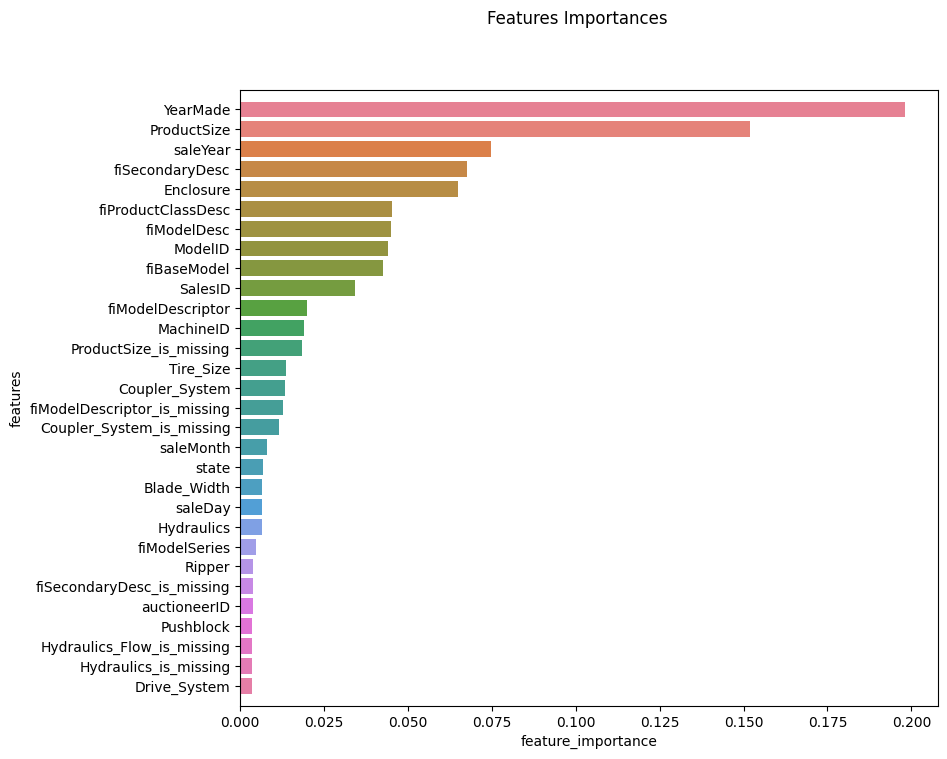

In [120]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(9, 8))

ax = sns.barplot(x="feature_importance",
                 y="features",
                 data=feat_Imp[:30],
                 orient="h",
                 hue="features")

fig.suptitle("Features Importances")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)